In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


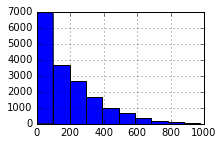

In [3]:
plt.figure(figsize=(3,2))
bike_rentals['cnt'].hist()  # cnt == count of total rental bikes 

In [4]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [5]:
def assign_label(hour):
    if hour >=6 and hour <12:
        return 1
    elif hour >=12 and hour <18:
        return 2
    elif hour >=18 and hour <24:
        return 3
    else:
        return 4
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)
print(bike_rentals['time_label'].value_counts())

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64


In [6]:
train = bike_rentals.sample(frac=.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [7]:
bike_rentals.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'time_label'],
      dtype='object')

#### prediction using linear regression

In [8]:
columns=['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'time_label']
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(train[columns], train['cnt'])
predictions = lr.predict(test[columns])
mse = mean_squared_error(test['cnt'], predictions)
rmse = mse**0.5
print(mse)
print(rmse)

17994.722230374377
134.14440812189815


#### prediction using decision tree

In [9]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(min_samples_leaf=5)
reg.fit(train[columns], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [10]:
predictions = reg.predict(test[columns])
mse = np.mean((predictions - test['cnt']) ** 2)
rmse = mse**0.5
print(mse, '   ', rmse)

2416.1172282984685     49.1540153832672


#### prediction using random forest

In [11]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[columns], train["cnt"])
predictions = reg.predict(test[columns])
mse = np.mean((predictions - test['cnt']) ** 2)
rmse = mse**0.5
print(mse, '   ', rmse)

1625.7702493854322     40.320841377449355


In [12]:
reg.fit(train[columns], train["cnt"])
predictions = reg.predict(test[columns])
mse = np.mean((predictions - test['casual']) ** 2)
rmse = mse**0.5
print(mse, '   ', rmse)

45898.062714133586     214.23833157055157


In [13]:
reg.fit(train[columns], train["cnt"])
predictions = reg.predict(test[columns])
mse = np.mean((predictions - test['registered']) ** 2)
rmse = mse**0.5
print(mse, '   ', rmse)

4557.5656141966365     67.50974458696045
